# Modern Portfolio Theory

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
df=pd.read_csv("GAIL.csv")

In [38]:
df

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,GAIL,EQ,15-May-2017,409.20,413.05,415.25,410.00,413.80,414.00,412.83,1077551,4.448488e+08,22153,459059,42.60
1,GAIL,EQ,16-May-2017,414.00,415.80,416.00,410.25,411.00,411.40,412.85,2434834,1.005216e+09,46472,1771251,72.75
2,GAIL,EQ,17-May-2017,411.40,411.50,412.90,405.60,408.50,408.30,408.42,2002105,8.177070e+08,48972,1405319,70.19
3,GAIL,EQ,18-May-2017,408.30,406.35,409.00,401.50,403.00,404.75,407.03,2132140,8.678451e+08,39137,1405640,65.93
4,GAIL,EQ,19-May-2017,404.75,404.00,406.35,396.00,401.35,401.05,400.31,2847835,1.140022e+09,64928,1922275,67.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,GAIL,EQ,07-May-2019,346.25,348.00,356.95,339.65,341.40,340.75,342.24,3456457,1.182924e+09,53960,1950942,56.44
490,GAIL,EQ,08-May-2019,340.75,341.00,345.15,336.40,337.50,337.50,340.43,3681837,1.253406e+09,51177,2069654,56.21
491,GAIL,EQ,09-May-2019,337.50,337.10,341.45,333.05,340.60,340.40,337.63,2761414,9.323433e+08,47265,1521196,55.09
492,GAIL,EQ,10-May-2019,340.40,341.00,343.80,338.20,340.75,341.55,341.45,1859456,6.349203e+08,46971,806093,43.35


In [39]:
df.dtypes

Symbol                     object
Series                     object
Date                       object
Prev Close                float64
Open Price                float64
High Price                float64
Low Price                 float64
Last Price                float64
Close Price               float64
Average Price             float64
Total Traded Quantity       int64
Turnover                  float64
No. of Trades               int64
Deliverable Qty             int64
% Dly Qt to Traded Qty    float64
dtype: object

In [40]:
df['Date']=df['Date'].astype('datetime64')

In [41]:
df = df[df.Series == 'EQ']
df.set_index('Date',inplace = True)
df.drop(['Series'],axis = 1,inplace = True)
df.head()

,Symbol,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,
2017-05-15,GAIL,409.20,413.05,415.25,410.00,413.80,414.00,412.83,1077551,4.448488e+08,22153,459059,42.60
2017-05-16,GAIL,414.00,415.80,416.00,410.25,411.00,411.40,412.85,2434834,1.005216e+09,46472,1771251,72.75
2017-05-17,GAIL,411.40,411.50,412.90,405.60,408.50,408.30,408.42,2002105,8.177070e+08,48972,1405319,70.19
2017-05-18,GAIL,408.30,406.35,409.00,401.50,403.00,404.75,407.03,2132140,8.678451e+08,39137,1405640,65.93
2017-05-19,GAIL,404.75,404.00,406.35,396.00,401.35,401.05,400.31,2847835,1.140022e+09,64928,1922275,67.50


In [42]:
df['Daily pct change']=df['Close Price'].pct_change()*100

In [43]:
mean_daily_return=df['Daily pct change'].mean()

In [44]:
standard_deviation=df['Daily pct change'].std()

In [45]:
annual_mean_return = round(mean_daily_return*252,2)
annual_std = round(standard_deviation*np.sqrt(252),2)

In [46]:
print("The annual return is: " + str(annual_mean_return))
print("The annual standard deviation is: " + str(annual_std))

The annual return is: -5.26
The annual standard deviation is: 33.84


# 5.2

Importing the datasets from different caps.

In [47]:
df1=pd.read_csv("PVR.csv")

In [48]:
df1.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,PVR,EQ,15-May-2017,1526.20,1532.35,1538.15,1515.45,1520.00,1524.95,1526.51,103693,1.582883e+08,7359,54518,52.58
1,PVR,EQ,16-May-2017,1524.95,1526.70,1545.00,1526.65,1533.25,1539.00,1538.04,86547,1.331129e+08,6332,39020,45.09
2,PVR,EQ,17-May-2017,1539.00,1539.70,1552.85,1526.05,1527.00,1530.30,1538.01,73902,1.136622e+08,4665,21303,28.83
3,PVR,EQ,18-May-2017,1530.30,1525.00,1539.35,1502.20,1514.90,1515.05,1519.68,82125,1.248035e+08,2903,38796,47.24
4,PVR,EQ,19-May-2017,1515.05,1515.00,1534.50,1502.20,1517.65,1513.55,1513.25,114890,1.738567e+08,9495,54764,47.67


In [49]:
df1=df1[df1.Series=='EQ']

In [50]:
df1['Date']=df1['Date'].astype('datetime64')

In [51]:
df1.set_index('Date')

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,PVR,EQ,1526.20,1532.35,1538.15,1515.45,1520.00,1524.95,1526.51,103693,1.582883e+08,7359,54518,52.58
2017-05-16,PVR,EQ,1524.95,1526.70,1545.00,1526.65,1533.25,1539.00,1538.04,86547,1.331129e+08,6332,39020,45.09
2017-05-17,PVR,EQ,1539.00,1539.70,1552.85,1526.05,1527.00,1530.30,1538.01,73902,1.136622e+08,4665,21303,28.83
2017-05-18,PVR,EQ,1530.30,1525.00,1539.35,1502.20,1514.90,1515.05,1519.68,82125,1.248035e+08,2903,38796,47.24
2017-05-19,PVR,EQ,1515.05,1515.00,1534.50,1502.20,1517.65,1513.55,1513.25,114890,1.738567e+08,9495,54764,47.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-07,PVR,EQ,1802.30,1795.00,1802.15,1772.45,1780.00,1780.10,1790.60,298337,5.342028e+08,19285,66333,22.23
2019-05-08,PVR,EQ,1780.10,1775.10,1777.45,1742.00,1749.00,1748.50,1758.96,369364,6.496950e+08,23001,84617,22.91
2019-05-09,PVR,EQ,1748.50,1750.00,1769.25,1740.00,1764.00,1758.45,1757.26,341158,5.995022e+08,23934,66607,19.52


In [52]:
df2=pd.read_csv("PNB.csv")

In [53]:
df2=df2[df2.Series=='EQ']
df2['Date']=df2['Date'].astype("datetime64")
df2.set_index('Date')
df2.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,PNB,EQ,2017-05-15,169.15,169.95,171.30,166.2,166.85,166.80,168.94,7476618,1.263123e+09,41641,1352589,18.09
1,PNB,EQ,2017-05-16,166.80,167.35,178.00,164.8,173.20,174.15,173.13,51532461,8.921904e+09,254027,5804867,11.26
2,PNB,EQ,2017-05-17,174.15,173.00,173.10,164.3,164.80,165.05,167.27,26536944,4.438942e+09,116512,7037498,26.52
3,PNB,EQ,2017-05-18,165.05,163.40,164.40,157.9,158.25,158.50,161.06,13905573,2.239613e+09,76746,3245443,23.34
4,PNB,EQ,2017-05-19,158.50,159.50,162.25,154.1,155.20,155.20,157.59,16311602,2.570540e+09,82394,2816963,17.27


In [54]:
df3=pd.read_csv("ADANIPOWER.csv")
df3['Date']=df3['Date'].astype('datetime64')
df3=df3[df3.Series=='EQ']
df3.set_index('Date')
df3.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,ADANIPOWER,EQ,2017-05-15,30.25,30.40,30.50,30.10,30.35,30.25,30.28,2666848,8.074250e+07,4292,861729,32.31
1,ADANIPOWER,EQ,2017-05-16,30.25,30.35,33.65,30.35,32.80,32.85,32.59,39322702,1.281594e+09,57037,5217922,13.27
2,ADANIPOWER,EQ,2017-05-17,32.85,32.95,33.75,32.45,33.00,33.10,33.13,27368209,9.067376e+08,38034,3760475,13.74
3,ADANIPOWER,EQ,2017-05-18,33.10,32.80,32.85,31.70,31.90,31.90,32.37,9833756,3.182696e+08,15013,2046350,20.81
4,ADANIPOWER,EQ,2017-05-19,31.90,33.25,33.25,32.00,32.45,32.40,32.55,12551755,4.085741e+08,20421,2456282,19.57


In [55]:
df4=pd.read_csv("ASHOKA.csv")
df4=df4[df4.Series=='EQ']
df4['Date']=df4['Date'].astype('datetime64')
df4.set_index('Date')
df4.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,ASHOKA,EQ,2017-05-15,210.35,211.0,217.5,206.15,216.30,216.05,212.63,159997,34020520.45,3506,88509,55.32
1,ASHOKA,EQ,2017-05-16,216.05,212.3,216.0,211.00,214.00,214.90,213.24,213214,45466299.10,2860,151941,71.26
2,ASHOKA,EQ,2017-05-17,214.90,214.3,218.7,212.10,216.55,217.00,215.97,383131,82743402.10,3297,261939,68.37
3,ASHOKA,EQ,2017-05-18,217.00,216.0,216.6,208.00,210.00,209.65,211.74,78709,16665707.55,1372,35458,45.05
4,ASHOKA,EQ,2017-05-19,209.65,212.1,213.9,205.05,206.05,206.25,209.95,398725,83713500.05,2060,301747,75.68


In [56]:
df5=pd.read_csv("HDFC.csv")
df5=df5[df5.Series=='EQ']
df5['Date']=df5['Date'].astype('datetime64')
df5.set_index('Date')
df5.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,HDFC,EQ,2017-05-15,1549.80,1554.5,1572.60,1554.10,1561.0,1559.50,1562.62,1270297,1.984990e+09,59917,955875,75.25
2,HDFC,EQ,2017-05-16,1559.50,1558.0,1569.00,1554.00,1568.0,1566.55,1564.05,2114918,3.307844e+09,79354,1652379,78.13
3,HDFC,EQ,2017-05-17,1566.55,1565.5,1570.95,1549.75,1550.1,1552.50,1557.08,2161434,3.365526e+09,80317,1794472,83.02
5,HDFC,EQ,2017-05-18,1552.50,1547.0,1558.60,1526.50,1545.0,1537.05,1539.03,2404372,3.700407e+09,85842,1837821,76.44
7,HDFC,EQ,2017-05-19,1537.05,1545.0,1548.00,1515.35,1526.5,1520.60,1526.14,2142433,3.269652e+09,113875,1601236,74.74


In [57]:
df1['Daily Pct Change'] = df1['Close Price'].pct_change()*100

daily_mean = df1['Daily Pct Change'].mean()
daily_std = df1['Daily Pct Change'].std()

annual_mean_1 = round(daily_mean*252,2)
annual_std_1 = round(daily_std*np.sqrt(252),2)
print("The annual return is: " + str(annual_mean_1))
print("The annual standard deviation is: " + str(annual_std_1))

The annual return is: 11.11
The annual standard deviation is: 31.02


In [58]:
df2['Daily Pct Change'] = df2['Close Price'].pct_change()*100

daily_mean = df2['Daily Pct Change'].mean()
daily_std = df2['Daily Pct Change'].std()

annual_mean_2 = round(daily_mean*252,2)
annual_std_2 = round(daily_std*np.sqrt(252),2)
print("The annual return is: " + str(annual_mean_2))
print("The annual standard deviation is: " + str(annual_std_2))

The annual return is: -23.94
The annual standard deviation is: 54.54


In [59]:
df3['Daily Pct Change'] = df3['Close Price'].pct_change()*100

daily_mean = df3['Daily Pct Change'].mean()
daily_std = df3['Daily Pct Change'].std()

annual_mean_3 = round(daily_mean*252,2)
annual_std_3 = round(daily_std*np.sqrt(252),2)
print("The annual return is: " + str(annual_mean_3))
print("The annual standard deviation is: " + str(annual_std_3))

The annual return is: 30.53
The annual standard deviation is: 61.05


In [60]:
df4['Daily Pct Change'] = df4['Close Price'].pct_change()*100

daily_mean = df4['Daily Pct Change'].mean()
daily_std = df4['Daily Pct Change'].std()

annual_mean_4 = round(daily_mean*252,2)
annual_std_4 = round(daily_std*np.sqrt(252),2)
print("The annual return is: " + str(annual_mean_4))
print("The annual standard deviation is: " + str(annual_std_4))

The annual return is: -20.85
The annual standard deviation is: 44.3


In [61]:
df5['Daily Pct Change'] = df5['Close Price'].pct_change()*100

daily_mean = df5['Daily Pct Change'].mean()
daily_std = df5['Daily Pct Change'].std()

annual_mean_5 = round(daily_mean*252,2)
annual_std_5 = round(daily_std*np.sqrt(252),2)
print("The annual return is: " + str(annual_mean_5))
print("The annual standard deviation is: " + str(annual_std_5))

The annual return is: 13.79
The annual standard deviation is: 21.46


# 5.3 Calculating volatility for discrete plots.

In [62]:
portfolio = pd.concat([df1['Daily Pct Change'],df2['Daily Pct Change'],df3['Daily Pct Change'],
                      df4['Daily Pct Change'],df5['Daily Pct Change']],axis = 1)
portfolio.dropna(inplace = True)
portfolio.columns = ['PVR','PNB','ADANIPOWER','ASHOKA','HDFC']
portfolio.head()

,PVR,PNB,ADANIPOWER,ASHOKA,HDFC
2,-0.565302,-5.225380,0.761035,0.977199,0.452068
3,-0.996537,-3.968494,-3.625378,-3.387097,-0.896875
5,-2.150573,-2.738402,-2.932099,-2.254545,-0.995169
7,-3.104013,-1.535893,-6.197655,-0.834809,-1.070232
9,0.708346,-0.033179,0.872600,0.175395,-0.049323


In [63]:
np.random.seed(42)

num_ports = len(portfolio.index)

all_weights = np.zeros((num_ports, len(portfolio.columns)))

ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)

sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    weights = np.array(np.random.random(5))
    weights = weights/np.sum(weights)
    
    all_weights[x,:] = weights
    
    ret_arr[x] = np.sum( (portfolio.mean() * weights * 252))
    
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(portfolio.cov()*252, weights)))
    
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

In [64]:
max_shr_ratio = sharpe_arr.argmax()
max_shr_ratio

214

In [65]:
min_vol = vol_arr.argmin()
min_vol

214

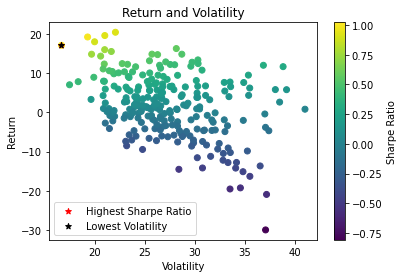

In [66]:
plt.figure()
plt.title("Return and Volatility")
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(vol_arr[max_shr_ratio],ret_arr[max_shr_ratio],marker = '*',c = 'red',label = 'Highest Sharpe Ratio')
plt.scatter(vol_arr[min_vol],ret_arr[min_vol],marker = '*',c = 'black',label = 'Lowest Volatility')
plt.legend()
plt.show()